In [1]:
from args import *
from model_head import *
from dataloader_COCO2014_person import *

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from PIL import ImageSequence


to_pil = transforms.ToPILImage()

model = UNetDesigner(d1=PARAMETERS['d1'],
                     d2=PARAMETERS['d2'],
                     d3=PARAMETERS['d3'],
                     d4=PARAMETERS['d4'],
                     b_=PARAMETERS['b_'],
                     u4=PARAMETERS['u4'],
                     u3=PARAMETERS['u3'],
                     u2=PARAMETERS['u2'],
                     u1=PARAMETERS['u1']
                     )

DEVICE = "cuda:0"
device = torch.device(DEVICE if torch.cuda.is_available() else "cpu")
device
model = model.to(device)

model.load_state_dict(torch.load('weights/weights.pth'))

<All keys matched successfully>

In [2]:
import os
import numpy as np

from PIL import Image
import scipy.ndimage.morphology as morph

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
                              transforms.Resize((INPUT_SIZE, INPUT_SIZE), interpolation = 0),
                              transforms.ToTensor()
                              ])

to_tensor = transforms.ToTensor()

In [3]:
FOLDER_TEST = "../r_unet/data/test_coco"
FILE_NAMES_TEST = sorted(os.listdir('../r_unet/data/test_coco'))
# FILE_NAMES

In [4]:
class TestMedData(Dataset):
    def __init__(self):
        super().__init__
        self.folder_test = FOLDER_TEST
        self.file_names = FILE_NAMES_TEST

    def __getitem__(self, idx):
        img = Image.open(self.folder_test + '/' + self.file_names[idx]).convert('RGB')
        tensor = transform(img)
        return tensor, img

    def __len__(self):
        return len(self.file_names)

In [5]:
dataset = TestMedData()

In [6]:
x, y = dataset[2]

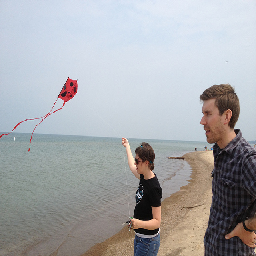

In [7]:
to_pil(x)

In [8]:
out = model(x.to(device))

In [9]:
len(out[0])

2

In [10]:
def showw(object, i):
    imgs = object[0].cpu()
    img = imgs[i]
    img = (img > 0.3).float()
    return to_pil(img)

In [11]:
index = 1
for i in range(len(out[0])):
    test_out = showw(out, i)
    test_out.save("../r_unet/data/test_coco_output/class_%d.png" % index)
    index += 1

In [12]:
print(out[0][1][70])
for i in range(len(out[0])):
    print(i)
    print(out[0][i])

tensor([-11.5538, -13.0607, -13.6031, -13.5205, -13.6441, -13.6272, -13.5089,
        -13.2473, -12.9721, -12.8475, -12.7563, -12.8011, -13.1232, -13.3575,
        -13.3217, -13.1787, -13.0944, -12.9276, -12.7834, -12.7166, -12.5363,
        -12.4696, -12.3483, -12.2211, -12.0854, -12.0033, -11.8193, -11.7841,
        -11.8301, -11.8156, -11.8104, -11.8219, -11.8312, -11.8471, -11.6771,
        -11.5233, -11.5043, -11.4791, -11.2989, -11.2468, -11.1587, -11.1212,
        -11.2113, -11.2920, -11.2716, -11.3315, -11.6545, -11.9529, -12.2359,
        -12.4168, -12.5600, -12.6528, -12.7330, -12.6435, -12.4024, -12.1486,
        -11.9933, -11.9244, -11.7133, -11.6743, -11.7649, -11.8249, -11.9874,
        -11.9698, -11.6409, -11.4952, -11.6029, -11.6112, -11.6653, -11.8217,
        -12.0625, -12.2740, -12.6975, -12.9037, -13.4403, -14.1476, -15.2635,
        -16.0906, -16.7157, -16.8038, -16.7900, -16.7438, -16.7763, -16.8755,
        -16.9888, -17.0878, -17.1371, -17.1031, -17.0818, -17.08

In [13]:
 print(out[0][0][60])

tensor([ 9.0003,  9.7573, 10.5308, 10.3010, 10.7077, 10.5867, 10.5201, 10.4271,
        10.2558, 10.0883, 10.0234,  9.9838, 10.2083, 10.4977, 10.7080, 10.6923,
        10.6460, 10.5125, 10.5458, 10.6122, 10.7113, 10.8690, 10.9335, 10.8516,
        10.7489, 10.6800, 10.5404, 10.5035, 10.4717, 10.2914, 10.0900, 10.0441,
        10.0075, 10.0167,  9.7814,  9.5024,  9.2378,  9.0201,  8.7917,  8.7140,
         8.5755,  8.4967,  8.6161,  8.6881,  8.7404,  8.9170,  9.2790,  9.4623,
         9.6921,  9.7798,  9.6496,  9.5592,  9.3832,  9.0979,  8.8947,  8.9141,
         9.0967,  9.4347,  9.6797,  9.6462,  9.5714,  9.4753,  9.4559,  9.5461,
         9.5665,  9.6954, 10.0516, 10.2171, 10.3376, 10.5485, 10.7982, 10.9442,
        11.0296, 10.9276, 10.9884, 11.2839, 12.0586, 12.7405, 13.1379, 13.1228,
        13.0878, 13.0526, 13.1059, 13.2245, 13.3889, 13.4780, 13.5185, 13.4878,
        13.4778, 13.5009, 13.5159, 13.4543, 13.2762, 13.1014, 12.9915, 12.9592,
        12.8662, 12.7866, 12.7107, 12.70

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

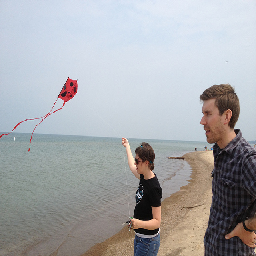

In [15]:
to_pil(x)

0


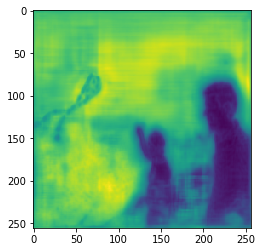

1


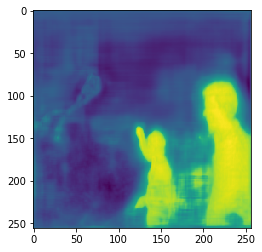

2


IndexError: index 2 is out of bounds for dimension 0 with size 2

In [16]:
%matplotlib inline
for i in range(182):
    print(i)
    imshow(out[0][i].detach().cpu())
    plt.show()